# Post Marketing Campaign Analysis

##  Problem statement

Given the customer profile data along with their purchase data,
- we want to analyse and fine tune our marketing campaign based on their performance. 

## ML Formuation

Given the data for various customer along with their purchase data,
- **segment the customer into various cluster** and 
- analyse which offer worked in which segment. 

### Why segmenting customers?

It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. 

For example:
- instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

Let's read the data and try to make sense of it

## Reading data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep ='\t')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Data dictionary

**People**

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise


**Products**

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years


**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month


## EDA

### How many features and datapoints are there ?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Observation:

- There are total of 2240 datapoints
- There are 29 columns in the dataset

### Are there any missing values in data? 

In [5]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Observation: 

- There are 24 missing values in Income column

Let's try to deep dive into it

In [6]:
data[data.Income.isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [7]:
#!pip install missingno

In [8]:
import missingno as msno

<AxesSubplot:>

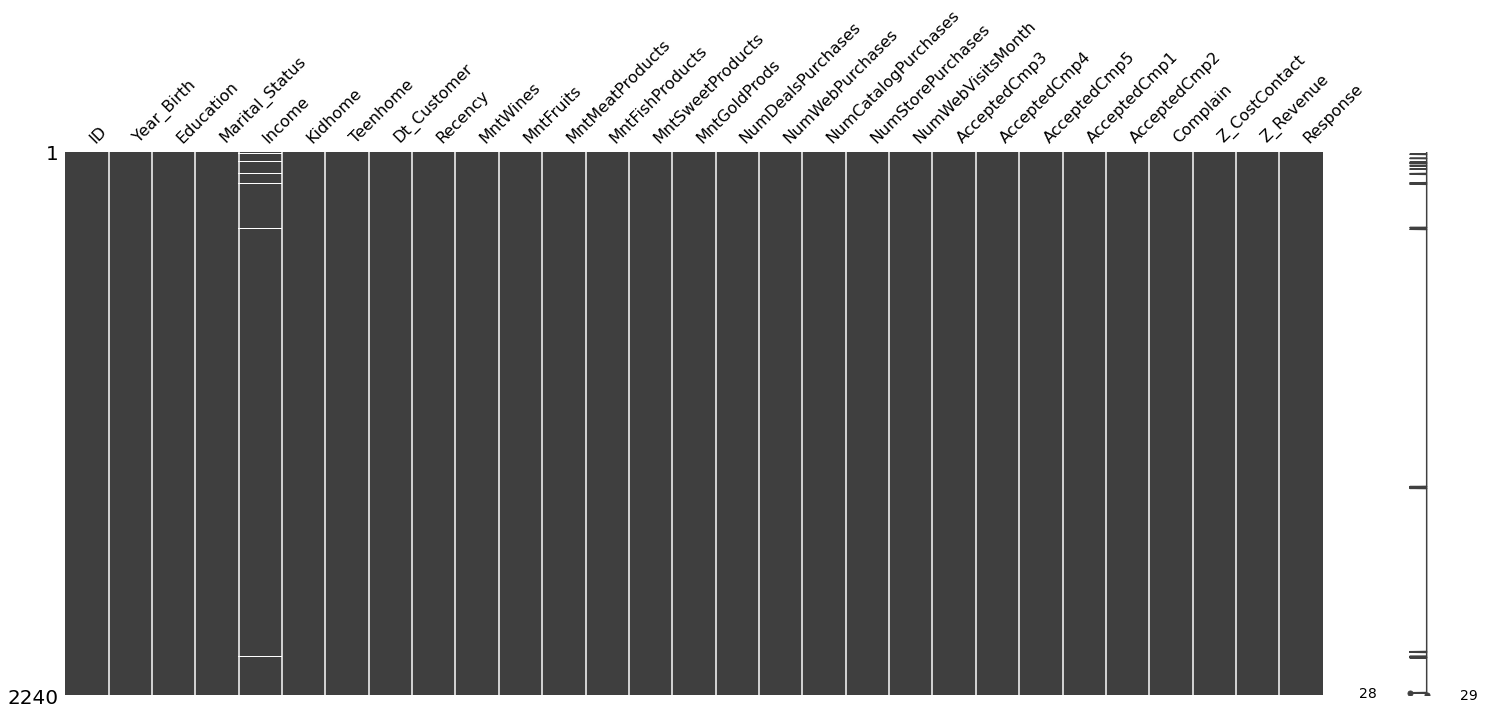

In [9]:
msno.matrix(data) 

We don't see any relation of Income missing with any other column i.e. MCAR (Missing Completely at random)
- We can either drop these datapoints or impute them with median value. 

We'll go ahead with dropping these datapoints

In [10]:
df = data[~data.Income.isna()]

In [11]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### High level insights

In [12]:
df.iloc[:,:15].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000


Observation:

- ID columns doesn't seem to contribute any information other than a unique identifier. 
- Year_birth has min value of 1893 => outlier. We will have to handle it


In [13]:
df.iloc[:, 15:].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Observation:

- Z_CostContact column has only single value present in it. 
    - Will no contribute to any analysis => We will remove it. 
    
Let's start with univariate analysis

### Univariate Analysis

#### ID

#### How many unique ids are there? 

In [14]:
df.ID.value_counts()

5524    1
6885    1
3478    1
7494    1
1763    1
       ..
7235    1
3560    1
5278    1
7761    1
9405    1
Name: ID, Length: 2216, dtype: int64

There are 2216 unique ids
- This column is nothing but identifies for rows

We can drop it

In [15]:
df.drop('ID', axis = 1, inplace = True)

/var/folders/s5/vpkmqfgd2f36hsdmsx6d9qsw0000gn/T/ipykernel_74468/2482910447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('ID', axis = 1, inplace = True)


#### Year_Birth

#### How many unique birth years are present ? 

In [16]:
df.Year_Birth.value_counts().keys().shape

(59,)

There are total of 59 unique birth years

#### What is the range of birth year ?

In [17]:
df.Year_Birth.describe()

count    2216.000000
mean     1968.820397
std        11.985554
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

Notice that:
- The min value of year is 1893 which feels errornous. 

Let's remove the outliers by
- converting years to age 
- thresholding the age

In [18]:
import datetime as dt

In [19]:
# get current year
current_year = dt.datetime.today().year

In [20]:
df['age'] = current_year - df.Year_Birth

/var/folders/s5/vpkmqfgd2f36hsdmsx6d9qsw0000gn/T/ipykernel_74468/3904875419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = current_year - df.Year_Birth


In [21]:
## dropping year birth

df.drop('Year_Birth', axis = 1, inplace = True)

/var/folders/s5/vpkmqfgd2f36hsdmsx6d9qsw0000gn/T/ipykernel_74468/4184103940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('Year_Birth', axis = 1, inplace = True)


#### Analysing age

In [22]:
df.age.describe()

count    2216.000000
mean       55.179603
std        11.985554
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: age, dtype: float64

Notice that:
- Min value of age is 28 => acceptable
- Max value of age is 131 => errornous 

We'll threshold the values using percentile 
- and remove these errornous datapoints

<AxesSubplot:ylabel='Density'>

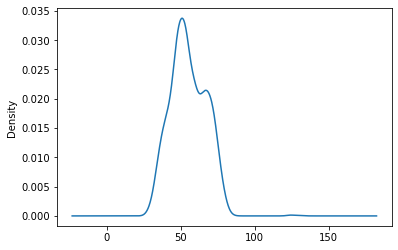

In [23]:
df.age.plot(kind = 'kde')

There are values with age > 100 

<AxesSubplot:>

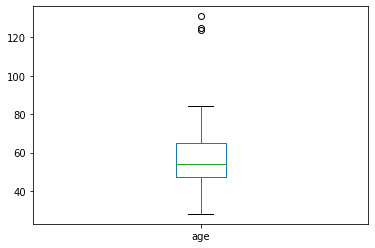

In [24]:
df.boxplot('age', grid = False)

In [25]:
for i in np.arange(0.99, 1.0, 0.001):
    print(f"{round(i*100,1)}th percentile age is {df.age.quantile(i)}")

99.0th percentile age is 79.0
99.1th percentile age is 79.0
99.2th percentile age is 79.2800000000002
99.3th percentile age is 80.0
99.4th percentile age is 80.0
99.5th percentile age is 80.0
99.6th percentile age is 81.0
99.7th percentile age is 81.0
99.8th percentile age is 82.14000000000033
99.9th percentile age is 115.40000000001237
100.0th percentile age is 131.0


Observation:

- There are datapoints with age > 100 

 We'll remove datapoints with age > 84 i.e 99.8th percentile. 

In [26]:
## Removing datapoints with age > 84
df = df[df.age <= 84]

In [27]:
df.shape

(2213, 28)

Observation

- 3 datapoints were removed. 

#### Education

In [28]:
df.Education.describe()

count           2213
unique             5
top       Graduation
freq            1116
Name: Education, dtype: object

There are 5 unique labels in Education columns 

Let's see what are those

<AxesSubplot:>

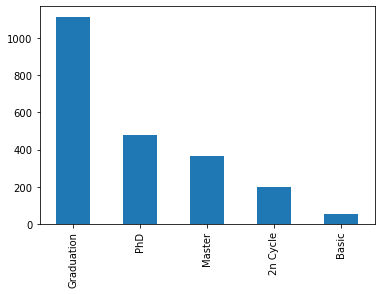

In [30]:
df.Education.value_counts().plot(kind ='bar')

Majority of customer have graduation
- followed by PhD

We can conclude that
- majority of population is atleast graduate (grad, phd, masters, 2n cycle)
- while only 54 people are undergrads (basic).

Based on this, we'll change the labels to Grad / Under Grad

In [31]:
df['education_status'] = df.Education.map(lambda x: 'Grad' if x in ['Graduation', 'PhD', 'Master', '2n Cycle'] else 'Under Grad')

/var/folders/s5/vpkmqfgd2f36hsdmsx6d9qsw0000gn/T/ipykernel_74468/1467062201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['education_status'] = df.Education.map(lambda x: 'Grad' if x in ['Graduation', 'PhD', 'Master', '2n Cycle'] else 'Under Grad')


<AxesSubplot:>

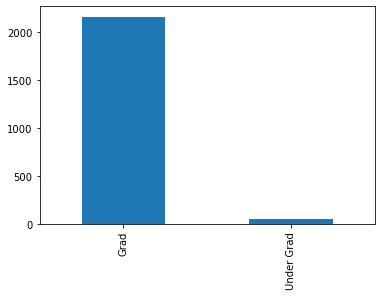

In [35]:
df.education_status.value_counts().plot(kind = 'bar')

#### Marital Status

In [38]:
df.Marital_Status.describe()

count        2213
unique          8
top       Married
freq          857
Name: Marital_Status, dtype: object

There are total of 8 unique labels in Marital status

let's look into what they are

In [42]:
df.Marital_Status.value_counts()

Married     857
Together    572
Single      470
Divorced    231
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

There are some absurd marital status in here
- Alone, Absurd, YOLO

Let's simplify them into four basic categories
- Single (Single, Alone, Absurd, YOLO)
- Relationship (Married, Together)
- Divorced (Divorced)
- Widow (Widow)

In [44]:
def update_status(status):
    if status in ['Married', 'Together']:
        return "Relationship"
    
    elif status in ['Single', 'Alone', 'Absurd', 'YOLO']:
        return "Single"

    else:
        return status

In [46]:
df['Marital_Status'] = df.Marital_Status.map(lambda x: update_status(x))

/var/folders/s5/vpkmqfgd2f36hsdmsx6d9qsw0000gn/T/ipykernel_74468/461611879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df.Marital_Status.map(lambda x: update_status(x))


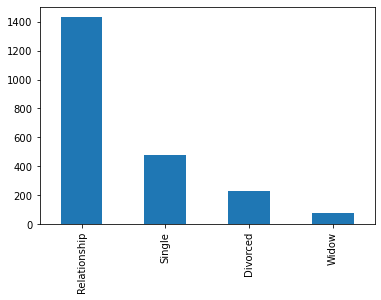

In [51]:
df.Marital_Status.value_counts().plot(kind = 'bar')
plt.show()

#### Income

In [54]:
df.Income.describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

<AxesSubplot:>

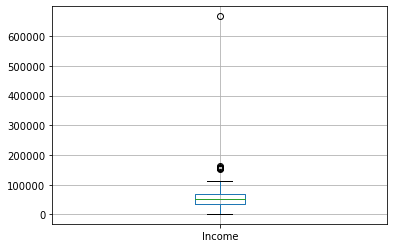

In [60]:
df.boxplot('Income')

Observation:

- Majority of people earn between 35k to 70k 
- While a few people earm about 600k 

Based on the figures, we assume the income given is annual income in dollars ($)

#### Kidhome

In [63]:
df.Kidhome.describe()

count    2213.000000
mean        0.441934
std         0.536965
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: Kidhome, dtype: float64

The columns shows the number of children in customer's household
- There are at max 2 kids in a household.

We can later try to analyse if customer with kids buy any specific product / offer

#### What is the distribution of kids in a household?

In [64]:
df.Kidhome.value_counts()

0    1281
1     886
2      46
Name: Kidhome, dtype: int64

<AxesSubplot:>

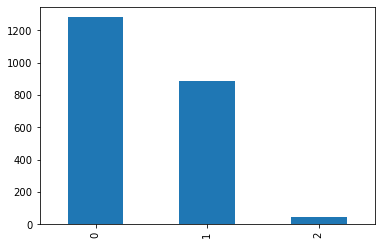

In [69]:
df.Kidhome.value_counts().plot(kind ='bar')

Observation
- Majority of customer don't have any kids 
- Followed by around 900 having only single kid. 

#### Teenhome

In [67]:
df.Teenhome.value_counts()

0    1145
1    1017
2      51
Name: Teenhome, dtype: int64

<AxesSubplot:>

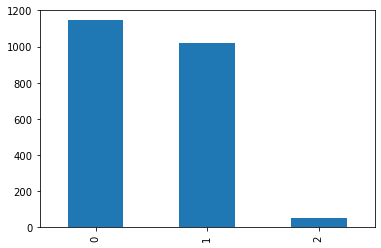

In [71]:
df.Teenhome.value_counts().plot( kind = 'bar')

The feature is similar to kidhome
- However, it records whether there is a teenager in the household

Majority of people don't have a teenager at home.

To simplify things,
- we can combine kidhome and teenage home to make a new feature => count_children

In [73]:
df['count_children'] = df.Kidhome + df.Teenhome

/var/folders/s5/vpkmqfgd2f36hsdmsx6d9qsw0000gn/T/ipykernel_74468/4058045806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count_children'] = df.Kidhome + df.Teenhome


Let's see how the distribution looks like

In [74]:
df['count_children'].value_counts()

1    1115
0     632
2     416
3      50
Name: count_children, dtype: int64

<AxesSubplot:>

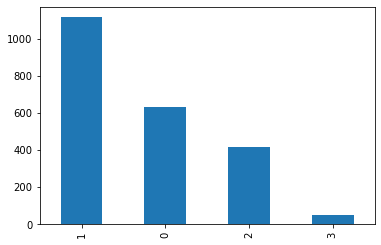

In [75]:
df['count_children'].value_counts().plot(kind = 'bar')

Majority of customer have
- single child at home
- Followed by no children.


There are few customers with 3 children as well. 

We can do further analysis on 
- whether the offer accepted varies with number of children.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2213 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2213 non-null   object 
 1   Marital_Status       2213 non-null   object 
 2   Income               2213 non-null   float64
 3   Kidhome              2213 non-null   int64  
 4   Teenhome             2213 non-null   int64  
 5   Dt_Customer          2213 non-null   object 
 6   Recency              2213 non-null   int64  
 7   MntWines             2213 non-null   int64  
 8   MntFruits            2213 non-null   int64  
 9   MntMeatProducts      2213 non-null   int64  
 10  MntFishProducts      2213 non-null   int64  
 11  MntSweetProducts     2213 non-null   int64  
 12  MntGoldProds         2213 non-null   int64  
 13  NumDealsPurchases    2213 non-null   int64  
 14  NumWebPurchases      2213 non-null   int64  
 15  NumCatalogPurchases  2213 non-null   i

#### Dt_Customer

In [84]:
df.Dt_Customer.dtype

dtype('O')

The dt_customer column tells us about the Date of customer's enrollment with the company
- However, the column datatype is of object

So, we'll have typecast it to datetime 

In [100]:
## changing dtype to datetime
df.Dt_Customer = df['Dt_Customer'].astype('datetime64[ns]')

/var/folders/s5/vpkmqfgd2f36hsdmsx6d9qsw0000gn/T/ipykernel_74468/2977231984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Dt_Customer = df['Dt_Customer'].astype('datetime64[ns]')


0      2012-01-04
1      2014-01-08
2      2013-01-21
3      2014-01-10
4      2014-01-19
          ...    
2235   2013-01-13
2236   2014-01-10
2237   2014-01-25
2238   2014-01-24
2239   2012-01-15
Name: Dt_Customer, Length: 2213, dtype: datetime64[ns]